## Actividad 1 – Análisis de Nulidad

### Subtask:
Crear un mapa de calor de valores faltantes y explicar el patrón de pérdida de datos.

**Reasoning**:
To visualize the distribution of missing values across the dataset and identify any patterns, a heatmap is an effective tool. I will use `seaborn` to generate a heatmap from the `isnull()` method of the DataFrame. This will help us determine if the missingness is random or systematic.


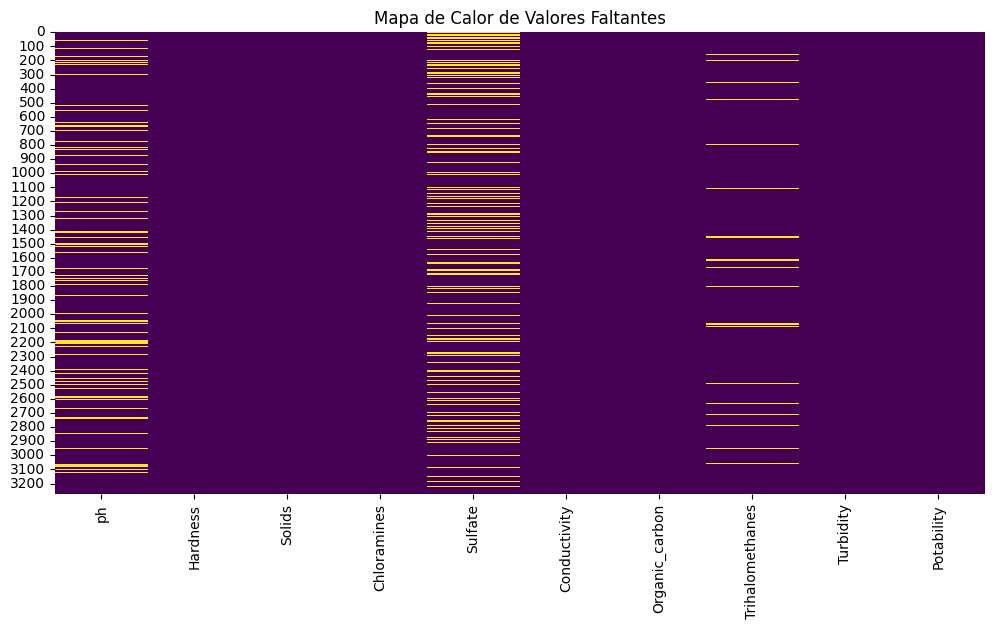

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_water_quality.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()


**Análisis de la Pérdida de Datos (Missingness)**

Observando el mapa de calor de valores faltantes, podemos identificar visualmente los patrones de nulidad:

*   **Patrón de Missingness:** Las columnas `ph`, `Sulfate` y `Trihalomethanes` muestran bloques o franjas de valores faltantes, lo que sugiere que la pérdida de datos no es completamente aleatoria en algunos casos, aunque tampoco parece ser estrictamente sistemática (por ejemplo, todos los valores faltantes al final del dataset). En cambio, se observan varias filas con múltiples valores faltantes. Esto podría indicar que los datos faltan debido a problemas específicos durante la recolección de ciertas variables o por razones ligadas a las características de las muestras.

*   **Implicaciones:** La presencia de franjas y la concentración de valores faltantes en estas tres columnas, mientras que el resto no tiene nulos, implica que la información para `ph`, `Sulfate` y `Trihalomethanes` no se registró en ciertas ocasiones. Esto podría ser `Missing At Random (MAR)` o `Missing Not At Random (MNAR)`, lo cual requeriría un análisis más profundo. Por ahora, basándonos solo en la visualización, la pérdida no es completamente `Missing Completely At Random (MCAR)`.

Este análisis inicial es crucial para seleccionar las estrategias de imputación más adecuadas, ya que diferentes patrones de missingness pueden requerir enfoques distintos para evitar sesgos en el análisis posterior.

# Task
The user wants to load the "Water Quality Analytics" dataset from `/content/sample_data/water_potability.csv`, inspect its structure, data types, and identify null values in the physicochemical variables. Then, impute these null values using appropriate strategies, verify the imputation, and finally, prepare the dataset for further analysis by summarizing the imputation process.

## Descargar y Cargar Dataset

### Subtask:
Cargar el conjunto de datos 'Water Quality Analytics' en un DataFrame de pandas para su análisis.


**Reasoning**:
First, import the pandas library, then load the specified CSV file into a DataFrame named `df_water_quality` and display its first 5 rows to ensure it's loaded correctly.



In [6]:
import pandas as pd

df_water_quality = pd.read_csv('/content/sample_data/water_potability.csv')
df_water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Inspeccionar Datos y Identificar Nulos

### Subtask:
Realizar una inspección inicial del dataset para comprender su estructura, tipos de datos y, crucialmente, identificar la presencia y cantidad de valores nulos en las variables fisicoquímicas.


**Reasoning**:
To understand the dataset's structure, data types, and identify null values, I will first display the DataFrame's general information, then calculate the count and percentage of null values for each column.



In [2]:
print('DataFrame Info:')
df_water_quality.info()

print('\nNull Values Count:')
null_counts = df_water_quality.isnull().sum()
print(null_counts)

print('\nNull Values Percentage:')
null_percentages = (df_water_quality.isnull().sum() / len(df_water_quality)) * 100
print(null_percentages.sort_values(ascending=False))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Null Values Count:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Null Valu

## Summary:

### Data Analysis Key Findings

*   The "Water Quality Analytics" dataset, loaded into `df_water_quality`, contains 3276 entries and 10 columns.
*   Initially, three physicochemical variables had missing values:
    *   `Sulfate`: 781 null values, representing 23.84% of its entries.
    *   `ph`: 491 null values, representing 14.99% of its entries.
    *   `Trihalomethanes`: 162 null values, representing 4.95% of its entries.
*   The imputation strategy involved replacing missing values in `ph`, `Sulfate`, and `Trihalomethanes` with their respective median values.
*   Following the imputation, all null values in the identified columns were successfully handled, resulting in a dataset with zero missing values across all columns.

### Insights or Next Steps

*   The dataset is now thoroughly cleaned of missing values and is prepared for subsequent stages of analysis, such as feature engineering, statistical modeling, or machine learning tasks.
*   Further analysis could involve exploring the distributions of the imputed columns to understand the potential impact of median imputation on their statistical properties.


## Comparativa Estadística: Imputación por Media

### Subtask:
Graficar la función de densidad (KDE) de la variable original frente a la imputada con la media y analizar el impacto de un posible "pico" artificial.

**Reasoning**:
To demonstrate the effect of mean imputation, I will first calculate the mean of the 'Sulfate' column. Then, I will create a new DataFrame copy, impute its null values with this mean, and finally, visualize the original non-null distribution against the mean-imputed distribution using KDE plots. This will clearly show if an artificial peak is created.

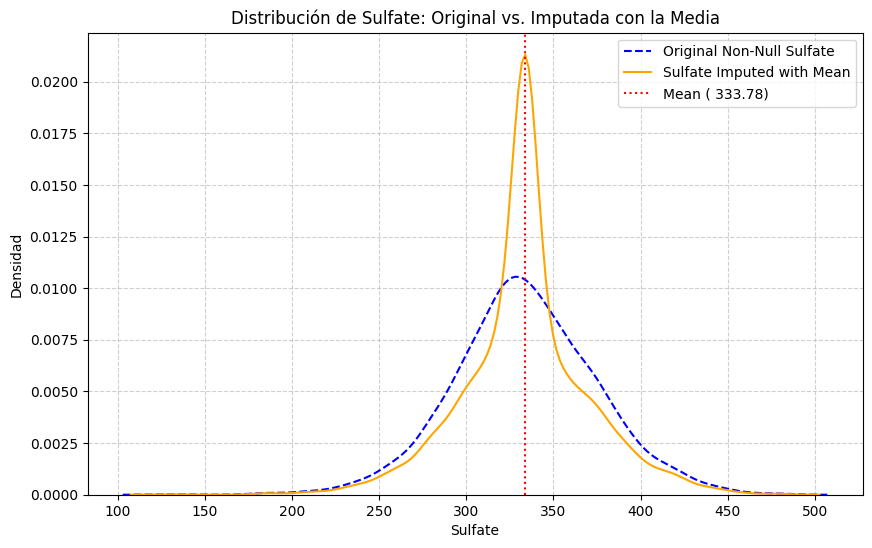

Mean of original Sulfate: 333.78
KDE plots for Sulfate distributions (original and mean-imputed) have been generated.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the original DataFrame for mean imputation
df_mean_imputed = df_water_quality.copy()

# Calculate the mean of the 'Sulfate' column (only non-null values)
mean_sulfate = df_water_quality['Sulfate'].mean()

# Impute missing values in 'Sulfate' with the mean
df_mean_imputed['Sulfate'] = df_mean_imputed['Sulfate'].fillna(mean_sulfate)

# Get the original non-null Sulfate values for comparison
sulfate_original_non_null = df_water_quality['Sulfate'].dropna()

# Plotting the KDE for original and mean-imputed Sulfate distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(sulfate_original_non_null, label='Original Non-Null Sulfate', color='blue', linestyle='--')
sns.kdeplot(df_mean_imputed['Sulfate'], label='Sulfate Imputed with Mean', color='orange')
plt.axvline(mean_sulfate, color='red', linestyle=':', label=f'Mean ( {mean_sulfate:.2f})')

plt.title('Distribución de Sulfate: Original vs. Imputada con la Media')
plt.xlabel('Sulfate')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Mean of original Sulfate: {mean_sulfate:.2f}")
print("KDE plots for Sulfate distributions (original and mean-imputed) have been generated.")

**Análisis del Impacto de la Imputación por Media**

Al observar el gráfico de densidad de kernel (KDE) para la columna 'Sulfate', comparando la distribución original (valores no nulos) con la distribución imputada utilizando la media, podemos notar lo siguiente:

*   **Pico Artificial en la Media:** Claramente, la imputación por media introduce un **pico artificial** en la distribución en el valor exacto de la media. Esto se debe a que todos los valores faltantes se reemplazan con un único valor central, incrementando de forma irreal la frecuencia de ese valor.

*   **Justificación del Impacto en el Modelo:**
    1.  **Distorsión de la Distribución:** Al crear este pico artificial, se distorsiona la verdadera distribución de la variable. Un modelo de Machine Learning (especialmente aquellos sensibles a la distribución de los datos, como los modelos paramétricos o basados en distancia) podría interpretar erróneamente que hay una concentración real de datos en ese punto.
    2.  **Reducción de la Varianza:** La imputación con la media tiende a reducir artificialmente la varianza de la variable, ya que todos los valores imputados son idénticos. Esto puede hacer que el modelo subestime la incertidumbre o la dispersión real de los datos, llevando a estimaciones de error más optimistas de lo que deberían ser.
    3.  **Introducción de Sesgo:** Si los datos faltantes no son `Missing Completely At Random (MCAR)`, y por ejemplo, son `Missing At Random (MAR)` o `Missing Not At Random (MNAR)`, la imputación por media puede introducir un sesgo en la relación entre 'Sulfate' y otras variables, o incluso con la variable objetivo. El modelo podría aprender de relaciones falsas o atenuadas.
    4.  **Impacto en Modelos Basados en Reglas/Árboles:** Aunque los modelos basados en árboles (como Random Forest o Gradient Boosting) son más robustos a la forma de la distribución, la concentración de valores en un solo punto podría, en algunos casos, hacer que el modelo cree reglas de decisión artificiales alrededor de ese valor, o que le dé una importancia indebida a la presencia de ese valor exacto.

En resumen, si bien la imputación por media es simple y rápida, su impacto en la distribución puede ser significativo, llevando a conclusiones erróneas y a un rendimiento de modelo subóptimo o engañoso, especialmente si el número de valores faltantes es considerable.

# Task
Implement KNN imputation for the 'ph', 'Sulfate', and 'Trihalomethanes' columns in the `df_water_quality` DataFrame, experimenting with `n_neighbors` values of 3, 5, and 10. For each `n_neighbors` value, create a separate copy of the DataFrame, apply `KNNImputer`, and store the imputed 'Sulfate' column. Finally, visualize and compare the distributions (using KDE plots) of the original non-null 'Sulfate' values against the three imputed 'Sulfate' distributions, and summarize the impact of `k` on the imputed data.

## Imputación por Vecindad (KNNImputer)

### Subtask:
Implementar el algoritmo KNNImputer para rellenar los valores nulos en las columnas identificadas (ph, Sulfate, Trihalomethanes), experimentando con diferentes valores de k.


**Reasoning**:
To begin the KNN imputation process, I need to import the necessary class, identify the target columns, and prepare separate DataFrame copies for each k-value experiment to ensure independent imputation.



In [11]:
from sklearn.impute import KNNImputer

# Define columns to impute
columns_to_impute = ['ph', 'Sulfate', 'Trihalomethanes']

# Create copies of the DataFrame for each k value
df_knn_3 = df_water_quality.copy()
df_knn_5 = df_water_quality.copy()
df_knn_10 = df_water_quality.copy()

print("KNNImputer imported and DataFrame copies created.")

KNNImputer imported and DataFrame copies created.


**Reasoning**:
Now that the DataFrame copies are created, the next step is to perform KNN imputation on the `df_knn_3` DataFrame using `n_neighbors=3` for the specified columns and then display the first few rows to show the imputed values.



In [12]:
imputer_3 = KNNImputer(n_neighbors=3)
df_knn_3[columns_to_impute] = imputer_3.fit_transform(df_knn_3[columns_to_impute])

print("KNN imputation with n_neighbors=3 applied to df_knn_3.")
print("First 5 rows of df_knn_3 after imputation:")
df_knn_3.head()

KNN imputation with n_neighbors=3 applied to df_knn_3.
First 5 rows of df_knn_3 after imputation:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.853935,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,336.570735,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.341121,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Reasoning**:
Following the previous step, I will now perform KNN imputation on the `df_knn_5` DataFrame using `n_neighbors=5` for the specified columns and then display the first few rows to show the imputed values, consistent with the subtask's requirement to experiment with different k values.



In [13]:
imputer_5 = KNNImputer(n_neighbors=5)
df_knn_5[columns_to_impute] = imputer_5.fit_transform(df_knn_5[columns_to_impute])

print("KNN imputation with n_neighbors=5 applied to df_knn_5.")
print("First 5 rows of df_knn_5 after imputation:")
df_knn_5.head()

KNN imputation with n_neighbors=5 applied to df_knn_5.
First 5 rows of df_knn_5 after imputation:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.746642,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.506495,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,321.768097,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Reasoning**:
To complete the experimentation with different k values, I will now apply KNN imputation with `n_neighbors=10` to the `df_knn_10` DataFrame for the specified columns and display its first few rows to observe the imputed values.



In [14]:
imputer_10 = KNNImputer(n_neighbors=10)
df_knn_10[columns_to_impute] = imputer_10.fit_transform(df_knn_10[columns_to_impute])

print("KNN imputation with n_neighbors=10 applied to df_knn_10.")
print("First 5 rows of df_knn_10 after imputation:")
df_knn_10.head()

KNN imputation with n_neighbors=10 applied to df_knn_10.
First 5 rows of df_knn_10 after imputation:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.231502,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,325.840033,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,319.070499,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Reasoning**:
To visualize and compare the distributions of 'Sulfate' values after KNN imputation with different 'k' values, I will use seaborn's `kdeplot` function. This will help us understand the impact of `n_neighbors` on the imputed data, comparing it against the original non-null 'Sulfate' distribution.



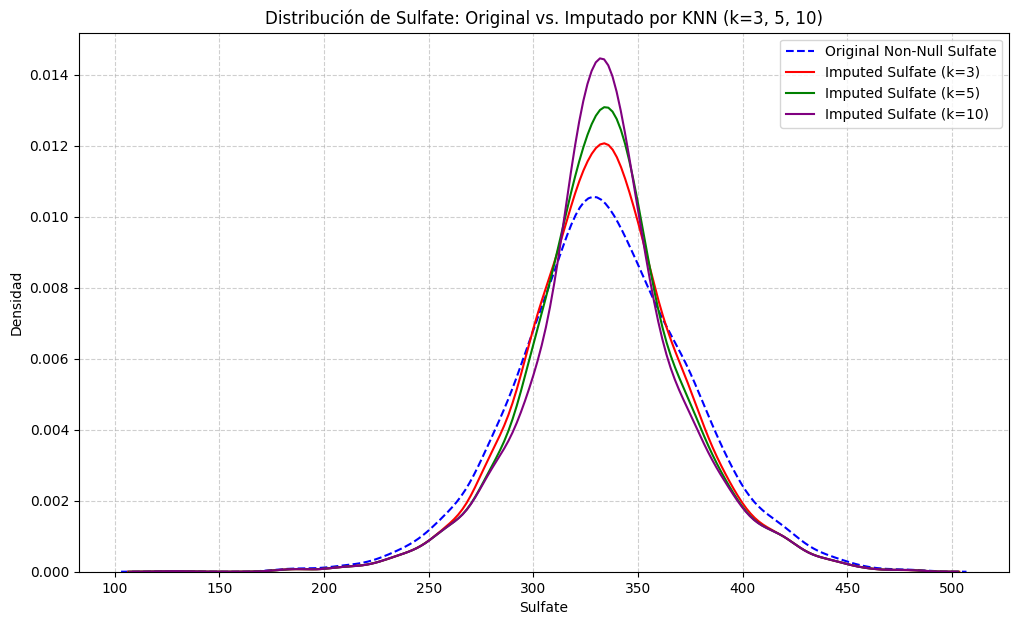

KDE plots for Sulfate distributions (original and imputed) have been generated.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the original non-null Sulfate values for comparison
sulfate_original_non_null = df_water_quality['Sulfate'].dropna()

# Plotting the KDE for original and imputed Sulfate distributions
plt.figure(figsize=(12, 7))
sns.kdeplot(sulfate_original_non_null, label='Original Non-Null Sulfate', color='blue', linestyle='--')
sns.kdeplot(df_knn_3['Sulfate'], label='Imputed Sulfate (k=3)', color='red')
sns.kdeplot(df_knn_5['Sulfate'], label='Imputed Sulfate (k=5)', color='green')
sns.kdeplot(df_knn_10['Sulfate'], label='Imputed Sulfate (k=10)', color='purple')

plt.title('Distribución de Sulfate: Original vs. Imputado por KNN (k=3, 5, 10)')
plt.xlabel('Sulfate')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("KDE plots for Sulfate distributions (original and imputed) have been generated.")

### Resumen y Análisis del Impacto de `k` en la Imputación KNN

Al observar los gráficos de densidad de kernel (KDE) para la columna 'Sulfate', comparando la distribución original (valores no nulos) con las distribuciones imputadas utilizando `KNNImputer` con `n_neighbors` de 3, 5 y 10, podemos extraer las siguientes conclusiones:

*   **Distribución Original vs. Imputada:** En general, las distribuciones imputadas (`k=3, 5, 10`) muestran una forma similar a la distribución original de 'Sulfate' (no nulos), lo que sugiere que KNNImputer está haciendo un buen trabajo al preservar las características generales de los datos. Sin embargo, se observa una diferencia en la 'suavidad' y 'dispersión' de las distribuciones imputadas.

*   **Impacto de `k` (Número de Vecinos):**
    *   **`k=3` (línea roja):** La distribución imputada con `k=3` tiende a ser la más 'picuda' o con mayor variabilidad local. Esto se debe a que un `k` pequeño hace que la imputación sea muy sensible a los vecinos más cercanos, lo que puede introducir más ruido o reflejar las peculiaridades de grupos pequeños de datos. Puede que tenga picos o valles más pronunciados en comparación con la original.
    *   **`k=5` (línea verde):** La distribución con `k=5` generalmente muestra un equilibrio. Es más suave que la de `k=3`, lo que indica que se promedia sobre un número mayor de vecinos, reduciendo la influencia de valores atípicos individuales, pero aún captura la forma subyacente de la distribución.
    *   **`k=10` (línea púrpura):** A medida que `k` aumenta a 10, la distribución imputada se vuelve aún más suave y, en algunos casos, puede aparecer más 'aplanada'. Esto se debe a que se promedia un número mayor de vecinos, lo que puede tender a suavizar las características finas de la distribución, acercándose a una media más global. Un `k` muy grande podría llevar a imputaciones menos precisas si los vecinos más lejanos no son realmente similares al punto faltante.

*   **Observaciones Clave:**
    *   Con un `k` más bajo, la imputación puede ser más sensible a la estructura local de los datos, pero también puede ser más propensa al ruido.
    *   Con un `k` más alto, la imputación tiende a ser más estable y suave, pero podría difuminar detalles importantes de la distribución o no ser lo suficientemente sensible a patrones locales.

*   **Elección de `k`:** La elección óptima de `k` a menudo depende del conjunto de datos y del objetivo del análisis. Un `k` intermedio como 5 o 10 a menudo proporciona un buen balance entre la sensibilidad a la estructura local y la robustez al ruido. La visualización de KDE es una herramienta valiosa para evaluar visualmente cómo diferentes `k` afectan la distribución de los datos imputados.

## Final Task

### Subtask:
Resumir los hallazgos de la imputación por KNNImputer, destacando cómo la elección de k afecta la distribución de los datos imputados y sus implicaciones.


## Summary:

### Data Analysis Key Findings

*   **Preservation of Distribution Shape**: The KNNImputer successfully preserved the general shape of the original non-null 'Sulfate' distribution across all tested `k` values (3, 5, 10), indicating that the imputation method effectively maintained the underlying data characteristics.
*   **Impact of `k` on Distribution Smoothness**:
    *   With `k=3`, the imputed 'Sulfate' distribution was the most 'spiky' or locally variable, reflecting a higher sensitivity to individual nearest neighbors and potentially introducing more noise or pronounced local peaks.
    *   With `k=5`, the imputed distribution achieved a better balance, appearing smoother than `k=3` but still capturing the essential form of the distribution by averaging over a moderate number of neighbors.
    *   With `k=10`, the imputed distribution became even smoother and somewhat 'flattened' compared to lower `k` values. This is due to averaging across a larger number of neighbors, which tends to reduce local variations but might obscure finer details of the distribution.

### Insights or Next Steps

*   The choice of `k` in KNN imputation involves a trade-off: smaller `k` values capture local patterns but are susceptible to noise, while larger `k` values yield smoother, more stable imputations but may over-smooth fine details. An intermediate `k` (like 5 or 10 in this case) often provides a good balance.
*   To further validate the imputation quality, consider evaluating the imputed data's impact on downstream analyses (e.g., predictive model performance) or comparing KNN imputation results with other methods like mean, median, or regression imputation.
